# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [4]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
print(np.shape(Array))
Array_V = Array[:,:,:,:,1,:]
print(np.shape(Array_V))

(2, 1, 88, 5, 2, 1)
(2, 1, 88, 5, 1)


In [5]:
Array_percent = np.mean(Array,axis=2)

In [6]:
print(np.shape(Array_percent))

(2, 1, 5, 2, 1)


[0, 1]


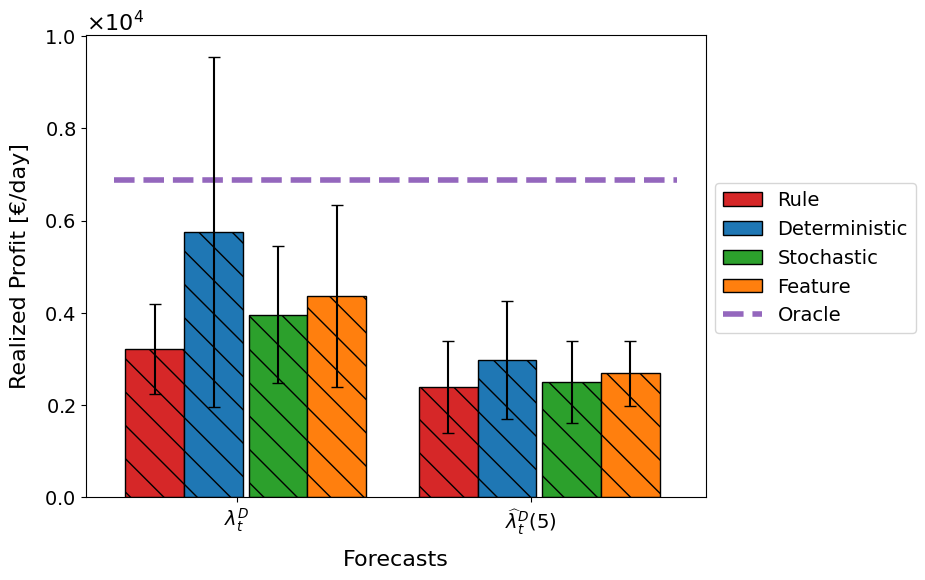

In [7]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$","$\widehat{\lambda}_{t}^{D}(20)$","$\widehat{\lambda}_{t}^{D}(40)$"]
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts",y_axis_label='Realized Profit [\u20AC/day]', x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_Bar_different_forecast_plot',bbox_to_anchor=(1.0, 0.7),legends=['Rule','Deterministic','Stochastic','Feature','Oracle'],ShowEachTestDay = False,save = True)

# Always accepted

In [8]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\100 Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [9]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])

In [10]:
Array_100 = np.mean(Array,axis=2)

[0, 1]


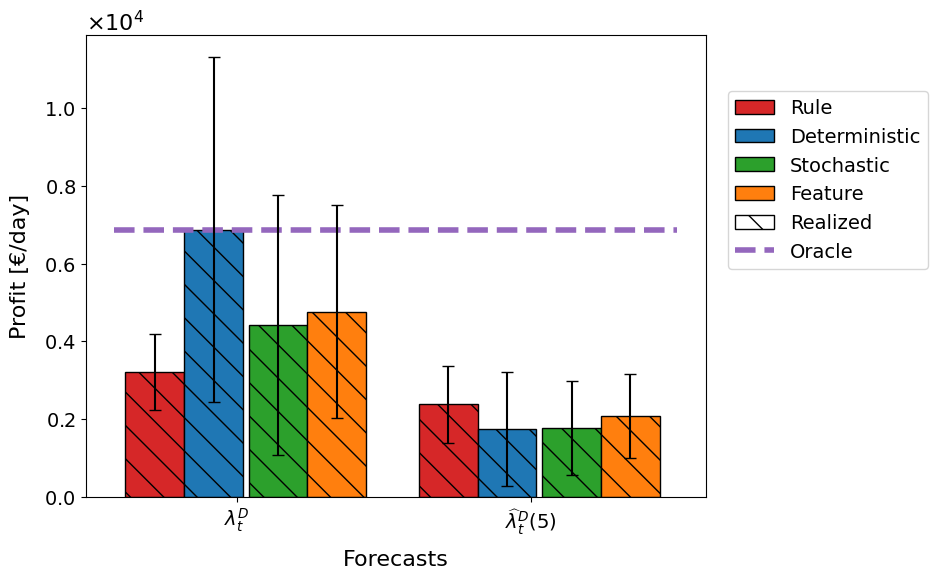

In [11]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)

### Table

In [12]:
lst = ["$\lambda_{t}^{D}$, $\widehat{y}(V)$","$\lambda_{t}^{D}$, $\widehat{y}(100\%)$","$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(V)$","$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(100\%)$"]

result_summary = [[lst[0]] + [int(Array_percent[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[1]] + [int(Array_100[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[2]] + [int(Array_percent[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[3]] + [int(Array_100[1, 0, i, 1, 0]) for i in range(0, 4)]
                  ]
print(result_summary)

[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 3951, 4369], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 3214, 6877, 4424, 4766], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(V)$', 2383, 2969, 2488, 2680], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(100\\%)$', 2383, 1754, 1782, 2073]]


In [13]:

print(result_summary)
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)
# Generate LaTeX table code
table_code = "\\begin{table}[H]\n"
table_code += "\\centering\n"
table_code += "\\caption{Average realized Profit(in $\euro/day$) based on forecast(perfect and base case) and on acceptance(volume based and 100 \% accepted assumption)}\n"
table_code += "\\label{tab:Forecast_acceptance}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 3951, 4369], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 3214, 6877, 4424, 4766], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(V)$', 2383, 2969, 2488, 2680], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(100\\%)$', 2383, 1754, 1782, 2073]]
+------------------------------------------------------+--------+-----------------+--------------+-----------+
|                                                      |   Rule |   Deterministic |   Stochastic |   Feature |
+======================================================+========+=================+==============+===========+
| $\lambda_{t}^{D}$, $\widehat{y}(V)$                  |   3214 |            5753 |         3951 |      4369 |
+------------------------------------------------------+--------+-----------------+--------------+-----------+
| $\lambda_{t}^{D}$, $\widehat{y}(100\%)$              |   3214 |            6877 |         4424 |      4766 |
+--------------------------

## Creating a combines acceptance and forecast bar plot

In [21]:
def plot_profit_Test(Array, PlotCase = "", Selected_models = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle'], x_axis_label = "Forecasts", x_axis_selection = [0,1,2], x_axis_tick_label = [1,2,3], 
                     y_axis_label =  'Profit [\u20AC/day]', Selected_Profit = ['Expected', 'Realized'], 
                     barwidth = 0.1, errorbar = False,
                     bbox_to_anchor=(1.02, 0.9),legends = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle','V','100'], 
                     ShowEachTestDay = False, pdf_name = 'Profit_Bar_plot' ,save = False):

    # Sample data
    #Array = np.random.rand(3, 6, 88, 5, 2)
    # PlotCase = 'Forecast' , 'Sample Size', ''
    #Forecast_names = [1,2,3]
    #SampleSize_names = [2,5,7,9,11]
    
    
    # Default settings
    color = ['C3', 'C0', 'C2', 'C1']  # Colors for the fourth dimension
    Model = ['Rule', 'Deterministic', 'Stochastic', 'Feature']
    Profit_labels = ["$\widehat{y}(V)$","$\widehat{y}(100)$"]  # Fill patterns for the fifth dimension
    Profit_patterns = ['', 'x']  # Fill patterns for the fifth dimension
    # /   - diagonal hatching
    # \   - back diagonal
    # |   - vertical
    # -   - horizontal
    # +   - crossed
    # x   - crossed diagonal
    # o   - small circle
    # O   - large circle
    # .   - dots
    # *   - stars
    bar_count = (len(Selected_models)) * len(Selected_Profit) # Number of bars in each group (5-1)*2
    if "Oracle" in Selected_models:
        linestyle = '--'
        linecolor = 'C4'
        linelabel = 'Oracle'
        bar_count = (len(Selected_models)-1) * len(Selected_Profit) # Number of bars in each group (5-1)*2
        

    # From Selected_models and Selected_Profit specify necessary settings aligned with the default
    model_idx = [i for i, m in enumerate(Model) if m in Selected_models]
    models = [Model[i] for i, m in enumerate(Model) if m in Selected_models]
    colors = [color[i] for i, m in enumerate(Model) if m in Selected_models]
    profit_idx = [i for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns_label = [Profit_labels[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns = [Profit_patterns[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]  # Fill patterns for the fifth dimension
    
    mean_values = np.mean(Array, axis=2)
    std_values = np.std(Array, axis=2)

    if PlotCase == "":
        x_axis_label = '' 
        xtick_names = 'off'
        x_axis = [1]
        
    else:
        x_axis = np.arange(len(x_axis_selection))
        xtick_names = x_axis_tick_label

    # Fixed settings

    y_axis_label = y_axis_label
    test_days = np.arange(Array.shape[2])

    legend_labels = models
    legend_colors = colors

    edgecolor = "black"
    linewidth = 4
    
    # Build the bar sizing and spacing
    bar_list = [i*0 for i in range(bar_count)]
    spacing = barwidth/10
    for i in range(bar_count):
        if i == 0:
            bar_list[i] = -(barwidth * bar_count / 2) + i * barwidth
        else:
            bar_list[i] = bar_list[i-1] + barwidth
        
        if i % 2 == 0:
            bar_list[i] = bar_list[i] + spacing
        
    size_around_tick = barwidth * bar_count / 2 + barwidth/2   

    

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Build the oracle model:

    # Plot value of the oracle model
    if "Oracle" in Selected_models:
        mean_value = np.mean(Array[0, 0, :, 4, 1,0])
        lines = ax.hlines(mean_value, 0 - size_around_tick + 4 *spacing, len(x_axis) - 1 + size_around_tick, color=linecolor, linestyle=linestyle, linewidth=linewidth)


    for x,xaxis  in enumerate(x_axis_selection):
        count_j = 0
        count_k = 0
        for j, color in enumerate(colors):
            for k, fill_pattern in enumerate(fill_patterns):
                # construct where on the x axis the bar is located

                # To get a little bit of spacing after each model
                
                j_mod = model_idx[j]
                k_mod = profit_idx[k]

                if PlotCase == 'Forecasts':
                    bar_left = x + bar_list[count_k]
                    f = x
                    s = 0
                    m = 0   

                elif PlotCase == 'Sample size':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = x
                    m = 0
                
                elif PlotCase == 'Model Exploration':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = 0
                    m = x

                else:
                    bar_left = bar_list[count_k]
                    f = 0
                    s = 0
                    m = 0


                
                # Define the height of the bar
                bar_height = mean_values[f,s,j_mod,k_mod,m]
                error_value = std_values[f,s,j_mod,k_mod,m]

                

                ax.bar(bar_left, bar_height, width=barwidth, color=color, hatch=fill_pattern, align='edge', edgecolor=edgecolor)

                x_position = bar_left + barwidth/2
                if errorbar == True:
                    ax.errorbar(x_position, bar_height, yerr=error_value, fmt='none', ecolor='black', capsize=4)

                if ShowEachTestDay == True:
                    for d,val in enumerate(test_days):
                        #print("(",bar_left,",",Array[x,2,d,j,k],")")
                        
                        ax.scatter(x_position,Array[f,s,j_mod,k_mod],s=2, edgecolor=edgecolor, color=color)

                count_k = count_k + 1
            count_j = count_j + 1




    # Set the x-axis ticks and tick labels
    
    if xtick_names != 'off':
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xtick_names, fontsize=16)
        ax.set_xlabel(x_axis_label, fontsize=16, labelpad=10)
    else:
        # Remove x axis
            
        #ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xlabel('')

    # Set the y-axis tick size
    ax.tick_params(axis='y', which='major', labelsize=20)
    
    ax.set_ylabel(y_axis_label, fontsize=16, labelpad=10)
    # Set the y-axis tick formatter
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 2))  # Adjust the power limits as needed
    plt.gca().yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_fontsize(16)  # Set the font size
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_tick_params(labelsize=14)

    # Create legend for the bars
    legend_handles = []

    for label, color in zip(legend_labels, legend_colors):
        if label in legends:
            rect = plt.Rectangle((0, 0), 1, 1, color=color, label=label)
            rect.set_edgecolor(edgecolor)
            legend_handles.append(rect)



    for label, pattern in zip(fill_patterns_label, fill_patterns):
        if label in legends: 
            legend_handles.append(plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor=edgecolor,  hatch=pattern, label=label))

    if "Oracle" in Selected_models:
        # Create legend for the horizontal line
        if "Oracle" in legends:
            legend_handles.append(plt.Line2D([0], [0], color=linecolor, linestyle=linestyle, label=linelabel,linewidth=linewidth))
    
    # Show the legend
    ax.legend(handles=legend_handles,bbox_to_anchor=bbox_to_anchor, loc='upper left',prop={'size': 14})



    if save == True:
        plt.savefig(f'Result_plots/'+ pdf_name +'.pdf',format="pdf", bbox_inches='tight')
    # Show the plot
    plt.show()

In [15]:

Array_V_100 = Array
Array_V_100[:,:,:,:,0,:] = Array_V


[0, 1]


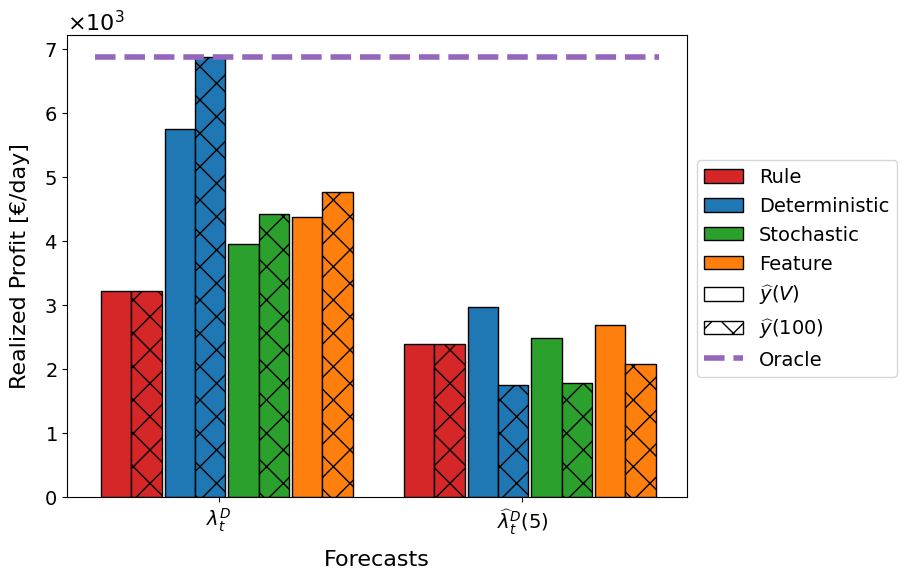

In [22]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)
Selected_Profit = ["$\widehat{y}(V)$","$\widehat{y}(100)$"]
legends = ["Rule","Deterministic","Stochastic","Feature","Oracle","$\widehat{y}(V)$","$\widehat{y}(100)$"]
plot_profit_Test(Array_V_100,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = Selected_Profit, barwidth = 0.1,legends = legends,bbox_to_anchor=(1.0, 0.75), y_axis_label= 'Realized Profit [\u20AC/day]',pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = True)